# Olypics Data Analysis
## CS 176 Project

By: Srushti Vaidyanathan (vaidyan4@purdue.edu), Paige Burke (burke231@purdue.edu), Brooklyn Fugate (fugate11@purdue.edu)

THE ORDER IN WHICH TO RUN THE CODE CELLS BELOW (numbered) FOR THE CODE TO RUN PROPERLY:

1, 2, 3, 4, 5, 6, 7, 14, 15, 16, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24

## Set Up

In [1]:
# 1

# importing pandas as pd, matplotlib as plt, and numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read datasets from their csv files to the dataframe
athletes_df = pd.read_csv('olympic_atheletes_history_biometrics_data.csv')
summer_df = pd.read_csv('summer_olympics_medals_data.csv')
winter_df = pd.read_csv('winter_olympics_medals_data.csv')

In [2]:
# 2

athletes_df.head(5)

,ID,ATHLETE_NAME,SEX,AGE,HEIGHT,WEIGHT,NOC,TEAM,Unnamed: 8
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Netherlands,NaN


In [3]:
# 3

summer_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1896,Aristidis Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Singles,NaN
1,1896,Aristidis Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Doubles,NaN
2,1896,Konstantinos Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Singles,NaN
3,1896,Konstantinos Akratopoulos,1896 Summer,Athina,Tennis,Tennis Men's Doubles,NaN
4,1896,Anastasios Andreou,1896 Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN


In [4]:
# 4

winter_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1924,Clarence John Abel,1924 Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1,1924,Josef Adolf,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
2,1924,Xavier Affentranger,1924 Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
3,1924,Xavier Affentranger,1924 Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
4,1924,Xavier Affentranger,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN


## Cleaning

CLEANING IS ALSO DONE THROUGHOUT THE OTHER STEPS

In [5]:
# 5

# deleting this column as it was empty and was just an extra comma in the csv
athletes_df = athletes_df.drop('Unnamed: 8', axis=1)
athletes_df = athletes_df.drop('ID', axis=1)

In [6]:
# 6

# standardizing to date time format for all the dfs
winter_df['Year'] = pd.to_datetime(winter_df['Year'], format='%Y')
summer_df['Year'] = pd.to_datetime(summer_df['Year'], format='%Y')

winter_df['Year'] = winter_df['Year'].dt.strftime('%Y')
summer_df['Year'] = summer_df['Year'].dt.strftime('%Y')

In [7]:
# 7

# drops any duplicate values from the dfs and only keeps the first value
winter_df = winter_df.drop_duplicates(keep='first')
summer_df = summer_df.drop_duplicates(keep='first')
athletes_df = athletes_df.drop_duplicates(keep='first')

## Filtering

OTHER FILTERING DONE THROUGHOUT THE OTHER SECTIONS

In [13]:
# 8

# Creating a subset of biometrics of just males and females, respectively, to compare using visualizations

female_athletes_df = total_df.loc[('F')]
male_athletes_df = total_df.loc[('M')]

display(female_athletes_df.head(3))
display(male_athletes_df.head(3))

,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Alpine Skiing,Forough Abbasi,20.0,164.0,58.0,IRI,Iran,2014,2014 Winter,Sochi,Alpine Skiing Women's Slalom,NaN
Alpine Skiing,Edme Abetel,29.0,164.0,58.0,SUI,Switzerland,1952,1952 Winter,Oslo,Alpine Skiing Women's Slalom,NaN
Alpine Skiing,Ilze bola,19.0,169.0,60.0,LAT,Latvia,1998,1998 Winter,Nagano,Alpine Skiing Women's Giant Slalom,NaN


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Aeronautics,Hermann Schreiber,26.0,171.0,63.0,SUI,Switzerland,1936,1936 Summer,Berlin,Aeronautics Mixed Aeronautics,Gold
Alpine Skiing,Kjetil Andr Aamodt,20.0,176.0,85.0,NOR,Norway,1992,1992 Winter,Albertville,Alpine Skiing Men's Downhill,NaN
Alpine Skiing,Kjetil Andr Aamodt,20.0,176.0,85.0,NOR,Norway,1992,1992 Winter,Albertville,Alpine Skiing Men's Super G,Gold


In regards to the subset above:

The athletes_df was broken down into a male_athletes_df and female_athletes_df to analyze the difference between men's and women's performance at the Olympics. The dataframe is subsetted using the 'Sex' column. We can use these new data frame for utilizing them in sorting and visualizations in comparing biometrics of females and males and comparing their trends to the overall population in the Olympics. Refer to code cells #11, #12, and #16 for further analysis.

In [14]:
# 9

# creates a df of only the athletes who have won a medal in their participation in the Olympics
# basically a CLEANED version of the total_df

winners_df = total_df[total_df['Medal'].notna()]

display(winners_df)

ATHLETE_NAME   AGE  HEIGHT  WEIGHT  \
SEX Sport                                                                   
F   Alpine Skiing               Debra Rae Armstrong  20.0   165.0    62.0   
    Alpine Skiing                       Heidi Biebl  19.0   159.0    56.0   
    Alpine Skiing                 Fernande Bochatay  18.0   163.0    57.0   
    Alpine Skiing                 Annemarie Buchner  27.0   181.0    90.0   
    Alpine Skiing                 Annemarie Buchner  27.0   181.0    90.0   
...                                             ...   ...     ...     ...   
M   Wrestling                        Zevegiin Oidov  22.0   168.0    62.0   
    Wrestling      Elmadi Zaynaydiyevich Zhabrailov  26.0   182.0    85.0   
    Wrestling                  Albert Conrad Zirkel  19.0   178.0    96.0   
    Wrestling                            dn Zombori  21.0   175.0    78.0   
    Wrestling                            dn Zombori  21.0   175.0    78.0   

                   NOC           TEAM  Year        Games          City  \
SEX Sport                                                                
F   Alpine Skiing  USA  United States  1984  1984 Winter      Sarajevo   
    Alpine Skiing  GER        Germany  1960  1960 Winter  Squaw Valley   
    Alpine Skiing  SUI    Switzerland  1968  1968 Winter      Grenoble   
    Alpine Skiing  GER        Germany  1952  1952 Winter          Oslo   
    Alpine Skiing  GER        Germany  1952  1952 Winter          Oslo   
...                ...            ...   ...          ...           ...   
M   Wrestling      MGL       Mongolia  1976  1976 Summer      Montreal   
    Wrestling      EUN   Unified Team  1992  1992 Summer     Barcelona   
    Wrestling      USA  United States  1904  1904 Summer     St. Louis   
    Wrestling      HUN        Hungary  1932  1932 Summer   Los Angeles   
    Wrestling      HUN        Hungary  1936  1936 Summer        Berlin   

                                                      Event   Medal  
SEX Sport                                                            
F   Alpine Skiing        Alpine Skiing Women's Giant Slalom    Gold  
    Alpine Skiing            Alpine Skiing Women's Downhill    Gold  
    Alpine Skiing        Alpine Skiing Women's Giant Slalom  Bronze  
    Alpine Skiing            Alpine Skiing Women's Downhill  Silver  
    Alpine Skiing        Alpine Skiing Women's Giant Slalom  Bronze  
...                                                     ...     ...  
M   Wrestling      Wrestling Men's Featherweight, Freestyle  Silver  
    Wrestling       Wrestling Men's Middleweight, Freestyle  Silver  
    Wrestling        Wrestling Men's Lightweight, Freestyle  Bronze  
    Wrestling       Wrestling Men's Bantamweight, Freestyle  Silver  
    Wrestling       Wrestling Men's Bantamweight, Freestyle    Gold  

[39845 rows x 11 columns]

In regards to the filtering above:

The winners_df is a new data frame that only contain the rows of the total_df (explained below) that have a non-NA value for the 'Medal' column.

We can use this filtered subset to analyze improvement in an athlete's performance over the years, as this only contains the data of the athletes who have won something, so by putting this data in a pivot table (as seen the pivot section below), we can see if an athlete gets better with each year participated in the Olympics. We can also use this data to create a visualization to measure athlete and country win frequency. Refer to code cells #10, #18, and #22 for further analysis.

In [15]:
# 10

# FILTERING into a new data frame of just the NOC and Medal column from the winners_df

country_medals_df = winners_df.filter(['NOC', 'Medal'])

# subset into gold silver bronze to see if any country consistently places

medals_groups = country_medals_df.groupby('Medal')

print('Countries with lowest number of medals earned:')
for m, medal_df in medals_groups:
    print(m)
    display(medal_df.groupby('NOC').size().idxmin())


print('Countries with most number of medals earned:')
for m, medal_df in medals_groups:
    print(m)
    display(medal_df.groupby('NOC').size().idxmax())

Countries with lowest number of medals earned:
Bronze


'ALB'

Gold


'ALB'

Silver


'AHO'

Countries with most number of medals earned:
Bronze


'USA'

Gold


'USA'

Silver


'USA'

In the filtering above:

The main goal of the filtering above is to figure out which country won the least/most of each medal type. We create a new subset of the winners_df to create a data frame with only the 'NOC' and 'Medal' columns of the winners_df. Using this subset, we use the group by function to group the dataframe by the 'Medal', making a dictionary of the medal type and the rows of the medal_df affliated with it. Finally, iterated through the dictionary, using the subset dataframe for each medal type and grouping them by the NOC. The size() function allowed us to see how many of each medal type each country won, and using the idxmax() and idxmin() functions, we found which countries had the lowest counts and highest counts per medal type. The results we found were that Albania had the lowest number of Bronze and Gold, and Netherlands Antilles with the lowest Silver. The United States ranked first for most number of Gold, Bronze, and Silver. To further analyze this data, we will graph the top 10 medal earning countries to see if there is a significant difference between the quantity of medals won by USA and the remaining countries. See code cell #13, #20, and #21 for more analysis.

## Sorting

In [16]:
# 11

# sorting by age of athletes (with male, female, and total) to see oldest/youngest athletes

print('Total Athletes')
display(total_df.sort_values(by=['AGE']).head(5))
display(total_df.sort_values(by=['AGE']).tail(5))

print('\n\nFemale Athletes')
display(female_athletes_df.sort_values(by=['AGE']).head(5))
display(female_athletes_df.sort_values(by=['AGE']).tail(5))

print('\n\nMale Athletes')
display(male_athletes_df.sort_values(by=['AGE']).head(5))
display(male_athletes_df.sort_values(by=['AGE']).tail(5))

Total Athletes


ATHLETE_NAME   AGE  HEIGHT  WEIGHT  NOC  \
SEX Sport                                                           
M   Gymnastics      Dimitrios Loundras  10.0   158.0    53.0  GRE   
F   Swimming              Liana Vicens  11.0   158.0    50.0  PUR   
    Figure Skating         Sonja Henie  11.0   155.0    45.0  NOR   
    Figure Skating          Liu Luyang  11.0   158.0    36.0  CHN   
    Figure Skating         Sonja Henie  11.0   155.0    45.0  NOR   

                           TEAM  Year        Games          City  \
SEX Sport                                                          
M   Gymnastics           Greece  1896  1896 Summer        Athina   
F   Swimming        Puerto Rico  1968  1968 Summer   Mexico City   
    Figure Skating       Norway  1928  1928 Winter  Sankt Moritz   
    Figure Skating        China  1988  1988 Winter       Calgary   
    Figure Skating       Norway  1924  1924 Winter      Chamonix   

                                                           Event   Medal  
SEX Sport                                                                 
M   Gymnastics             Gymnastics Men's Parallel Bars, Teams  Bronze  
F   Swimming        Swimming Women's 4 x 100 metres Medley Relay     NaN  
    Figure Skating                Figure Skating Women's Singles    Gold  
    Figure Skating              Figure Skating Mixed Ice Dancing     NaN  
    Figure Skating                Figure Skating Women's Singles     NaN

ATHLETE_NAME   AGE  HEIGHT  WEIGHT  NOC  \
SEX Sport                                                                     
M   Art Competitions                Louis Tauzin  81.0   150.0    59.0  FRA   
    Art Competitions  Thomas Cowperthwait Eakins  88.0   173.0    76.0  USA   
    Art Competitions               Winslow Homer  96.0   176.0    75.0  USA   
    Art Competitions          William Washington  97.0   150.0    59.0  GBR   
    Art Competitions      John Quincy Adams Ward  97.0   150.0    59.0  USA   

                               TEAM  Year        Games         City  \
SEX Sport                                                             
M   Art Competitions         France  1924  1924 Summer        Paris   
    Art Competitions  United States  1932  1932 Summer  Los Angeles   
    Art Competitions  United States  1932  1932 Summer  Los Angeles   
    Art Competitions  Great Britain  1948  1948 Summer       London   
    Art Competitions  United States  1928  1928 Summer    Amsterdam   

                                                               Event Medal  
SEX Sport                                                                   
M   Art Competitions              Art Competitions Mixed Sculpturing   NaN  
    Art Competitions  Art Competitions Mixed Painting, Unknown Event   NaN  
    Art Competitions  Art Competitions Mixed Painting, Unknown Event   NaN  
    Art Competitions   Art Competitions Mixed Painting, Graphic Arts   NaN  
    Art Competitions     Art Competitions Mixed Sculpturing, Statues   NaN



Female Athletes


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Figure Skating,Marcelle Matthews,11.0,160.0,48.0,RSA,South Africa,1960,1960 Winter,Squaw Valley,Figure Skating Mixed Pairs,NaN
Gymnastics,Luigina Giavotti,11.0,150.0,39.0,ITA,Italy,1928,1928 Summer,Amsterdam,Gymnastics Women's Team All-Around,Silver
Figure Skating,Liu Luyang,11.0,158.0,36.0,CHN,China,1988,1988 Winter,Calgary,Figure Skating Mixed Ice Dancing,NaN
Figure Skating,Megan Olwen Devenish Taylor,11.0,157.0,45.0,GBR,Great Britain,1932,1932 Winter,Lake Placid,Figure Skating Women's Singles,NaN
Figure Skating,Sonja Henie,11.0,155.0,45.0,NOR,Norway,1936,1936 Winter,Garmisch-Partenkirchen,Figure Skating Women's Singles,Gold


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Art Competitions,Winifred Marie Louise Austen,72.0,169.0,63.0,GBR,Great Britain,1948,1948 Summer,London,"Art Competitions Mixed Painting, Unknown Event",NaN
Art Competitions,Winifred Marie Louise Austen,72.0,169.0,63.0,GBR,Great Britain,1948,1948 Summer,London,"Art Competitions Mixed Painting, Graphic Arts",NaN
Art Competitions,Ernestine Lonie Ernesta Robert-Mrignac,74.0,169.0,63.0,FRA,France,1924,1924 Summer,Paris,Art Competitions Mixed Sculpturing,NaN
Art Competitions,Marie Rosenfeld,74.0,169.0,63.0,FRA,France,1924,1924 Summer,Paris,Art Competitions Mixed Sculpturing,NaN
Art Competitions,Hilda Roberts,74.0,169.0,63.0,IRL,Ireland,1932,1932 Summer,Los Angeles,"Art Competitions Mixed Painting, Unknown Event",NaN




Male Athletes


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Gymnastics,Dimitrios Loundras,10.0,158.0,53.0,GRE,Greece,1896,1896 Summer,Athina,"Gymnastics Men's Parallel Bars, Teams",Bronze
Rowing,Carlos Bienvenido Front Barrera,11.0,170.0,72.0,ESP,Spain,1992,1992 Summer,Barcelona,Rowing Men's Coxed Eights,NaN
Figure Skating,Alain C. Giletti,12.0,173.0,68.0,FRA,France,1956,1956 Winter,Cortina d'Ampezzo,Figure Skating Men's Singles,NaN
Figure Skating,Jan Hoffmann,12.0,178.0,73.0,GDR,East Germany,1968,1968 Winter,Grenoble,Figure Skating Men's Singles,NaN
Figure Skating,Jan Hoffmann,12.0,178.0,73.0,GDR,East Germany,1972,1972 Winter,Sapporo,Figure Skating Men's Singles,NaN


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Art Competitions,Louis Tauzin,81.0,150.0,59.0,FRA,France,1924,1924 Summer,Paris,Art Competitions Mixed Sculpturing,NaN
Art Competitions,Thomas Cowperthwait Eakins,88.0,173.0,76.0,USA,United States,1932,1932 Summer,Los Angeles,"Art Competitions Mixed Painting, Unknown Event",NaN
Art Competitions,Winslow Homer,96.0,176.0,75.0,USA,United States,1932,1932 Summer,Los Angeles,"Art Competitions Mixed Painting, Unknown Event",NaN
Art Competitions,John Quincy Adams Ward,97.0,150.0,59.0,USA,United States,1928,1928 Summer,Amsterdam,"Art Competitions Mixed Sculpturing, Statues",NaN
Art Competitions,William Washington,97.0,150.0,59.0,GBR,Great Britain,1948,1948 Summer,London,"Art Competitions Mixed Painting, Graphic Arts",NaN


In regards to the sorting above:

Since we graphed the density graphs for visualizations of the age distributions of the total data, males, and females, we wanted to see the exact range difference between men and women. For this, we sorted the total_df, female_athletes_df, and male_athletes_df by the 'AGE' column and took the head and tale of each of these to see the oldest and youngest people for each of these sorts. We found that the overall age range of the was from 10 - 97 year olds. This age range actually aligned exactly with the male df as well, which was somewhat seem in the distribution of the density graphs as well. However, the range for the women was signficantly smaller. It ranged from 11 - 74 year olds, which is 24 years smaller of a range than it was for males. This can also be seen in the density plot as the distrubtion for women is narrower than men. Something interesting to note about the data is that the youngest athletes are typically in artistic sports like figure-skating and gymnastics. The older end of the spectrum is all from the arts competitions, which is not related to the recently Games' athletics. Refer to cells #12 and #17 for further analysis.

In [17]:
# 12

# FILTERING OUT the arts competitions and SORTING by age of athletes (with male and female) to see oldest athletes

print('Female Athletes')
display(female_athletes_df.loc[female_athletes_df.index != 'Art Competitions'].sort_values(by=['AGE']).tail(5))

print('\n\nMale Athletes')
display(male_athletes_df.loc[male_athletes_df.index != 'Art Competitions'].sort_values(by=['AGE']).tail(5))

Female Athletes


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Equestrianism,Brenda Lilian Williams,61.0,162.0,53.0,GBR,Great Britain,1956,1956 Summer,Stockholm,"Equestrianism Mixed Dressage, Individual",NaN
Equestrianism,Julie Brougham,62.0,157.0,48.0,NZL,New Zealand,2016,2016 Summer,Rio de Janeiro,"Equestrianism Mixed Dressage, Individual",NaN
Archery,Lida Peyton Pollock,63.0,176.0,64.0,USA,United States,1904,1904 Summer,St. Louis,Archery Women's Team Round,Gold
Archery,Lida Peyton Pollock,63.0,176.0,64.0,USA,United States,1904,1904 Summer,St. Louis,Archery Women's Double Columbia Round,Bronze
Archery,Lida Peyton Pollock,63.0,176.0,64.0,USA,United States,1904,1904 Summer,St. Louis,Archery Women's Double National Round,Bronze




Male Athletes


,ATHLETE_NAME,AGE,HEIGHT,WEIGHT,NOC,TEAM,Year,Games,City,Event,Medal
Sport,,,,,,,,,,,
Archery,Thomas Foster Scott,71.0,195.0,105.0,USA,United States,1904,1904 Summer,St. Louis,Archery Men's Double York Round,NaN
Archery,Thomas Foster Scott,71.0,195.0,105.0,USA,United States,1904,1904 Summer,St. Louis,Archery Men's Double American Round,NaN
Sailing,Charles William Martin,71.0,188.0,100.0,FRA,France,1900,1900 Summer,Paris,Sailing Mixed Open,NaN
Sailing,Charles William Martin,71.0,188.0,100.0,FRA,France,1900,1900 Summer,Paris,Sailing Mixed 0.5-1 Ton,Silver
Sailing,Charles William Martin,71.0,188.0,100.0,FRA,France,1900,1900 Summer,Paris,Sailing Mixed 3-10 Ton,NaN


In regards to the sort above:

We further filtered the data to only include the sports that were not Art Competitions to be more up to date with recent athletics. We found that the oldest female athlete was then 63 years old, and the oldest male athlete was 71 years old. The female athlete was an archer and the male a sailor. Even without the Arts Competitions, the age gap between oldest males and females is a large, at 8 years apart.

In [28]:
# 13

# SORT by number of medals earned by country

# grouping the df by NOC so that we can get the number of instances each country appears
country_medal_counts_df = country_medals_df.groupby('NOC').size().reset_index()
country_medal_counts_df.rename(columns={0:'Count'}, inplace=True)

country_medal_counts_df.sort_values(by='Count', ascending=False, ignore_index=True, inplace=True)

display(country_medal_counts_df.head(10))

,NOC,Count
0,USA,5636
1,URS,2667
2,GBR,2079
3,GER,2055
4,FRA,1764
5,ITA,1624
6,SWE,1538
7,CAN,1345
8,AUS,1321
9,HUN,1132


In regards to the sort above:

Since we previously filtered to find which which country had the most and least of each medal type, we wanted to actually compare the counts of the total number of medals earned by each country. We were especially curious about this statistic as the USA had a clean sweep over having the most Gold, Silver, and Bronze, so we wanted to see if there was a significant difference between the USA as the leading country and the country in second place. 

To do this, we created a new dataframe called country_medal_counts_df by grouping by the NOC values, and took the size (which allowed us to get the number of instances of each country in country_medal_df). Finally, we sorted the values in descending order to get the countries with the most medals to be displayed at the top of the dataframe. 

From this sorting we find that the USA does infact have a much greater amount of medals earned than any of the other countries, having over twice as many medals as the second place country, Russia. We want to further analyze this data using two different visualizations: 
- creating a bar graph of top 10 countries with most medals to actually see this difference in a visual format
- a histogram of number of medals won (as bins on xaxis) and number of countries who have won that many medals to see the general distrubitions of how many medals a country wins on average

Refer to cells #20 and #21 for further analysis.

## Merging

In [10]:
# 14

# merging the winter_df with summer_df using inner to only have the rows of athletes who have participated in both the summer and winter olympics

overlapping_athletes_df = pd.merge(winter_df, summer_df, on=['Name'], how='inner', suffixes=['_w','_s'])

# FILTERING the data to only include rows where the Summer and Winter participation years were within 20 years of one another
overlapping_athletes_df = overlapping_athletes_df[abs(overlapping_athletes_df['Year_w'].astype(int) - overlapping_athletes_df['Year_s'].astype(int)) <= 20]

print(len(overlapping_athletes_df.Name.unique()))
display(overlapping_athletes_df.tail())

275


,Year_w,Name,Games_w,City_w,Sport_w,Event_w,Medal_w,Year_s,Games_s,City_s,Sport_s,Event_s,Medal_s
1739,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2004,2004 Summer,Athina,Athletics,Athletics Women's 100 metres,Silver
1740,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2004,2004 Summer,Athina,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
1741,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2008,2008 Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
1742,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2008,2008 Summer,Beijing,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
1743,2014,Lauryn Chenet Williams,2014 Winter,Sochi,Bobsleigh,Bobsleigh Women's Two,Silver,2012,2012 Summer,London,Athletics,Athletics Women's 4 x 100 metres Relay,Gold


In regards to the merge above:

The overlapping_athletes_df above is very interesting in the fact that it covers athletes that have competed in both the Summer and the Winter Olympics. It starts by merging the winter_df and the summer_df on the 'Name' column, using the 'inner' merge technique. This allows us to only retain the rows with athletes who have a name under the summer_df and winter_df. However, upon initially analyzing this data, we noticed that some of the athletes had a lengthy gap between their Summer and Winter record (ex. a Summer record 40-60 years apart from their Winter record). This made us realize that there are several athletes with the same name. For this reason, to make the data more accurate, we filtered the data to include only the rows with the Summer year and Winter year value to be within 20 years of each other, as an average athlete won't attend more than 5 Olympic cycles in their lifetime. This filtered the data to be more accurate, such as Lauryn Williams, shown above, who participated in both bobsleigh and athletics. Some of the data however, may still be inaccurate, as several people have had the same names, as well as the fact that for several years, some of the Winter Sports were held along side the Summer Sports. However, generally, this merged and filtered data set well represents the data of athletes who have participated in both the Winter and Summer Olympics. There are 275 unique athletes in this data frame who have participated in both seasons.

In [11]:
# 15

# merging the winter_df with summer_df using outer to have all of the rows of both data sets
all_seasons_df = pd.merge(winter_df, summer_df, on=['Year', 'Name', 'Games', 'City', 'Sport', 'Event', 'Medal'], how='outer')

all_seasons_df.head(5)

,Year,Name,Games,City,Sport,Event,Medal
0,1924,Clarence John Abel,1924 Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1,1924,Josef Adolf,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN
2,1924,Xavier Affentranger,1924 Winter,Chamonix,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
3,1924,Xavier Affentranger,1924 Winter,Chamonix,Cross Country Skiing,Cross Country Skiing Men's 18 kilometres,NaN
4,1924,Xavier Affentranger,1924 Winter,Chamonix,Nordic Combined,Nordic Combined Men's Individual,NaN


In regards to the merge above:

The new dataframe that was created, called 'all_seasons_df' combines the winter_df and summer_df to have a new dataframe containing data of all instances of an athlete's performance in the Olympics. It will contain the data of every event and the winner from both the summer and the winter olympics. We combined these data frames using the common columns: Year, Name, Games, City, Sport, Event, and Medal.

The main use for this data frame will be to merge this with the athletes_df to get a combined dataframe of all of the data, further explained below (#16).

In [27]:
# 16

# Merging all three data sets into a total data set

# first merges the athletes df with winter df
total_df = pd.merge(athletes_df, all_seasons_df, left_on='ATHLETE_NAME', right_on='Name')
total_df = total_df.drop('Name', axis=1)


# CLEANING height, weight, and age of total_df by stack and sorting
# by gender and sport, then forward fill, to get similar data to fill in the NA values

total_df = total_df.set_index(['SEX', 'Sport']).sort_index()
total_df['AGE'].ffill(inplace=True)
total_df['WEIGHT'].ffill(inplace=True)
total_df['HEIGHT'].ffill(inplace=True)

display(total_df)

ATHLETE_NAME   AGE  HEIGHT  WEIGHT  NOC  \
SEX Sport                                                         
F   Alpine Skiing     Forough Abbasi  20.0   164.0    58.0  IRI   
    Alpine Skiing        Edme Abetel  29.0   164.0    58.0  SUI   
    Alpine Skiing          Ilze bola  19.0   169.0    60.0  LAT   
    Alpine Skiing      Agnese boltia  17.0   166.0    60.0  LAT   
    Alpine Skiing      Agnese boltia  17.0   166.0    60.0  LAT   
...                              ...   ...     ...     ...  ...   
M   Wrestling          Edward uawnik  27.0   165.0    73.0  POL   
    Wrestling      Alberts Zvejnieks  25.0   165.0    73.0  LAT   
    Wrestling      Alberts Zvejnieks  25.0   165.0    73.0  LAT   
    Wrestling      Armands Zvirbulis  24.0   177.0    84.0  LAT   
    Wrestling            Karel Zvona  23.0   177.0    84.0  TCH   

                             TEAM  Year        Games       City  \
SEX Sport                                                         
F   Alpine Skiing            Iran  2014  2014 Winter      Sochi   
    Alpine Skiing     Switzerland  1952  1952 Winter       Oslo   
    Alpine Skiing          Latvia  1998  1998 Winter     Nagano   
    Alpine Skiing          Latvia  2014  2014 Winter      Sochi   
    Alpine Skiing          Latvia  2014  2014 Winter      Sochi   
...                           ...   ...          ...        ...   
M   Wrestling              Poland  1960  1960 Summer       Roma   
    Wrestling              Latvia  1928  1928 Summer  Amsterdam   
    Wrestling              Latvia  1936  1936 Summer     Berlin   
    Wrestling              Latvia  2012  2012 Summer     London   
    Wrestling      Czechoslovakia  1936  1936 Summer     Berlin   

                                                          Event Medal  
SEX Sport                                                              
F   Alpine Skiing                  Alpine Skiing Women's Slalom   NaN  
    Alpine Skiing                  Alpine Skiing Women's Slalom   NaN  
    Alpine Skiing            Alpine Skiing Women's Giant Slalom   NaN  
    Alpine Skiing                 Alpine Skiing Women's Super G   NaN  
    Alpine Skiing            Alpine Skiing Women's Giant Slalom   NaN  
...                                                         ...   ...  
M   Wrestling         Wrestling Men's Welterweight, Greco-Roman   NaN  
    Wrestling          Wrestling Men's Heavyweight, Greco-Roman   NaN  
    Wrestling          Wrestling Men's Heavyweight, Greco-Roman   NaN  
    Wrestling      Wrestling Men's Light-Heavyweight, Freestyle   NaN  
    Wrestling         Wrestling Men's Welterweight, Greco-Roman   NaN  

[270363 rows x 11 columns]

In regards to the merge above:

The new dataframe that was created, called 'total_df' contains a combined dataframe with the rows and columns from all three of the original data sets, winter_df, summer_df, and athletes_df. It was merged using the all_seasons_df (explained above), and the athletes_df using the name of the athlete. 

We will use this data frame first to clean the data in the athletes_df, by stacking using the gender and sport and sorting these indices, to fill data for the age, height and weight columns of the dataframe. The reason we sort by the gender and sport is so that we can impute similar biometrics for the athletes with missing data (ex. not accidentally using a male wrestlers' weight for a female figure skater). While there are several NA values in the 'Medal' column, we will not be cleaning this, as the NA value just represents that they did not win that year. Instead, we will created a new filtered subset, called winners_df (see cell #9), to 'clean' to only have the values of athletes who have a medal. We can also use this data frame to analyze the athletes and the events they won in by pivoting (#23). It is also very helpful in analyzing and comparing biometrics between 'Sex' and 'Sport' (#8). The data from this dataframe is used to make a scatter plot comparing athlete physic in the winter vs the summer as it contains the athlete's biometrics and was combined with the seasonal data as well (#19). Overall this dataframe was created to make it similar to access all of the information from all three of the initial datasets interchangably without having to make minor merges as needed. 

## Visualizations

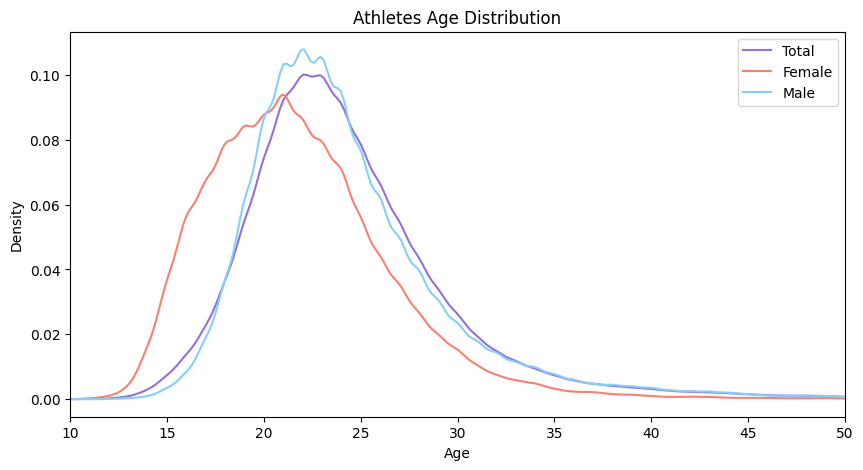

In [19]:
# 17

# graph age for all athletes, female, and males and see where most athletes lie

fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(hspace=0.5)

# creates the plots
athletes_df['AGE'].plot.kde(ax=ax, color='mediumpurple')
female_athletes_df['AGE'].plot.kde(ax=ax, color='salmon')
male_athletes_df['AGE'].plot.kde(ax=ax, color='lightskyblue')

# sets the x limit so that it fits the general age range for athletes
ax.set_xlim(10, 50)

# sets the xticks so that we can see closer to where the discrepencies between each subset is
ax.set_xticks([x for x in range(10, 51, 5)])

# sets the labels and titles
ax.set_xlabel('Age')
ax.set_title('Athletes Age Distribution')
ax.legend(['Total','Female', 'Male'])

plt.show()

In regards to the above grouped density graph above:

The graphs above are 3 density graphs that each respectively analyze the age of all athletes, just female athletes, and just male athletes. As we can see, the majority of athletes, in all three dataframes, fall between the ages of about 15 and 35. This makes sense as the minimum age you have to be to enter in the Olympics is 15 years old. 35 also makes sense as an upper end of the scale as the average retirement age for professional atheletes is 30, so having a small percentage of athletes (about 5%) who go outside that range makes sense. Something to notice between the female distribution vs the male distributions is that the females seems to have more younger participants vs males having older. The female distribution starts at an age younger than 15 (as the minimum age rule was implemented in 1981, so several games occured where athletes could have been younger) while the male distribution starts after the age of 15. However, the female distribution dies down around 35 years old while the male distribution is still on a decline and ends closer to 40. Females generally also seem to have a bit of a more even spread of age over their range, as the peak of their distribution has a smaller percentage than the peak of the male distribution. This trend can also be noticed in the fact that the graph itself of females is wider vs males having a steaper incline/decline to the peak. Another interesting trend to notice is that the 'Total' line follows closely along the 'Male' line, possibly indicating that there have been more male athletes than female that have competed in the Olympics.

ATHLETE_NAME    Michael Fred Phelps, II
count                                28
Name: 0, dtype: object

             count
count  7046.000000
mean      2.653420
std       1.328385
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      28.000000


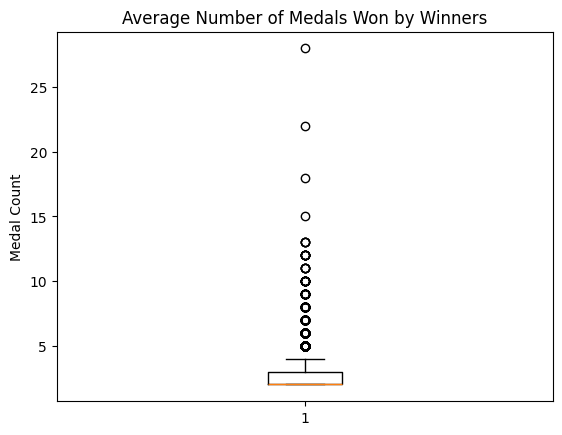

In [20]:
# 18

# creates a box plot of average number of times an athlete wins (not including atheles who have never won)

athlete_occurences = winners_df.groupby('ATHLETE_NAME').size().tolist()
  
# FILTERS to only have the athletes who have competed more than once
athlete_occurences = [x for x in athlete_occurences if x > 1]

athlete_occurences_df = winners_df.groupby('ATHLETE_NAME')['ATHLETE_NAME'].value_counts().reset_index()
display(athlete_occurences_df.sort_values(by='count', ascending=False, ignore_index=True).loc[0])
print(athlete_occurences_df[athlete_occurences_df['count'] > 1].describe())

plt.boxplot(athlete_occurences, showfliers=True)

plt.ylabel('Medal Count')
plt.title('Average Number of Medals Won by Winners')

plt.show()

In regards to the box plot above:

The box plot was created to represent the distribution of the number of times an athlete places on the podium. For this, we first grouped the winners data set using the 'ATHLETE_NAME' column. Then we filtered to only have the rows where the athletes have earned a medal more than 1 time, as the average was overwhelmingly 1 so didn't show much of a visualization. We also found the 5 number summary for this distribution, to help us understand the visualization. We found that the minimum number of medals was occurences was 2, median was also 2, average was 2.65, 75% was 3, and maximum was 28. This means the an athlete (which we found was Michael Phelps) has won 28 Olympics medals in his career, which is an amazing achievement, where he even set the world record for most number of medals won. Overall, based on this graph, we can infer that the average athlete did not place more than 3 times.

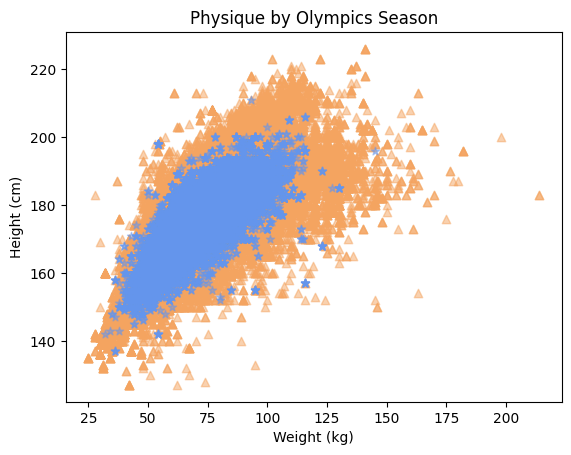

In [21]:
# 19

# scatter plot representing the differences between winter athletes and summer athletes physiques

season = ['Summer', 'Winter']
markers = ['^', '*']
colours = ['sandybrown', 'cornflowerblue']

# plots the weight on the xaxis and height on the yaxis for each season
for i in range(2):
    x = total_df[total_df['Games'].str.contains(season[i])]['WEIGHT']
    y = total_df[total_df['Games'].str.contains(season[i])]['HEIGHT']
    plt.scatter(x, y, marker=markers[i], color=colours[i], alpha=0.5)


# used to get the five number summary for height and weight for each season
# for i in range(2):
#     x = total_df[total_df['Games'].str.contains(season[i])]['WEIGHT']
#     y = total_df[total_df['Games'].str.contains(season[i])]['HEIGHT']
#     print(season[i])
#     print(x.describe())
#     print(y.describe())
#     print('---------------------')

plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Physique by Olympics Season')

plt.show()

In regards to the scatter plot above:

The scatter plot above was created to analyze the differences in the physiques of the summer athletes and winter athletes. With the height on the xaxis and weight on the yaxis, we can see the distribution of height and weight by season. The winter athletes are the ones in blue/stars while the orange triangles are the summer athletes. There are two unique things we can observe from this data set. First is that, the athletes in the winter seem to be much smaller and lighter than the summer athletes. In some way this makes sense as the events in the winter are less physically intensive (as in the need to build muscle mass) as opposed to summer sports (such as wrestling, javelin, and shot put). According to the five number summary, the minimum weight in the summer was 25 kg and in winter 32 kg, and the max weight in summer was 214 kg as opposed to 145 kg in the winter. As we can see, the minimum weight is relatively similar for winter and summer, but there is a difference of 59 kg for the max. While part of this can be creditted to the difference in physical intensity of winter and summer sports, the main (and second) observation to note from this visualization is that the number of athletes who competed in the summer is significantly greater than the number of athletes who have competed in the winter. Overall, the average weight between the two seasons is about the same at around 71 kgs. Overall, we can conclude that while the summer and winter athletes do have some differences in physique, the main contributer to this is the larger quanity of athletes in the summer. Additional, the relationship between height and weight in both the summer and winter is linear (as anticipated).

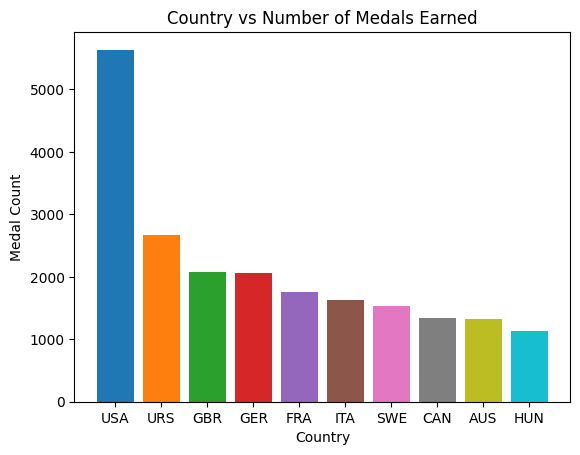

In [22]:
# 20

# creating a bar graph of top 10 countries with most medals

for i in range(10):
    plt.bar(country_medal_counts_df.iloc[i]['NOC'], country_medal_counts_df.iloc[i]['Count'])


plt.title('Country vs Number of Medals Earned')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()

In regards to the bar graph above:

This bar graph was made to expand on the filtered and sorted data 'country_medal_counts_df' (from cell #13). This visualization shows the distribution of the number of medals earned by the top 10 medal earning countries. To make this bar graph, we plotted the each of the Top 10 coutries on the xaxis and the amount of medals they won on the yaxis. The main reason we wanted to create this visualization was because the USA (the country with most medals) had twice as much as the second place country. To put this into a visual format, we can clearly see the bar for the USA being twice as tall as the second place country, Russia. The distribution from the second place onwards makes some more sense as the medal counts per country are closer too each other and are reasonably linear, but through this visualization we can see the overwhelming difference. This difference may because the USA provides more funding for athletes and training for more sports and events, allowing them to enter more athletes in the games and giving them a better change to win. 

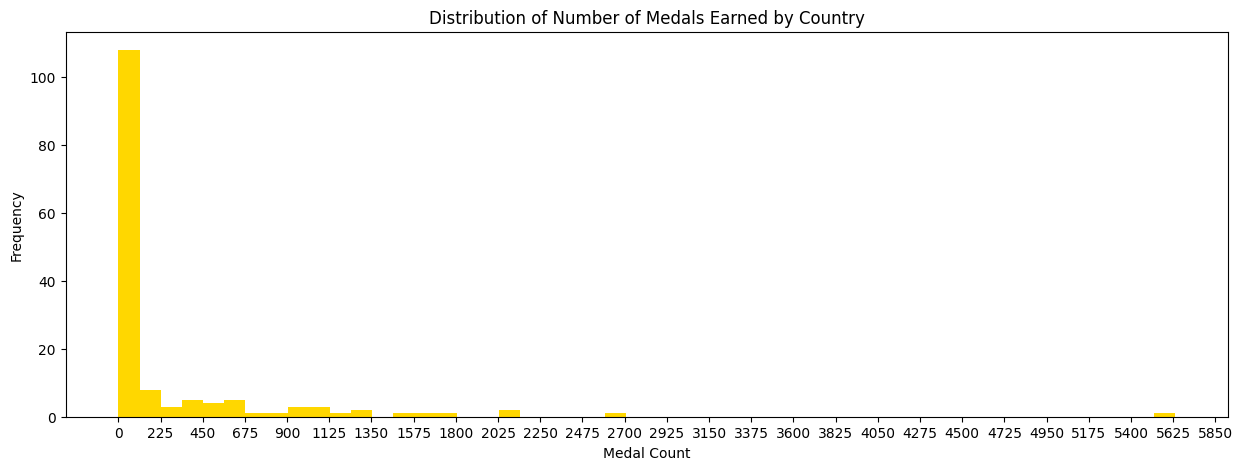

In [23]:
# 21

# a histogram of number of medals won (as bins on xaxis) and number of countries who have won that many medals 
# to see the general distrubitions of how many medals a country wins on average
plt.figure(figsize=(15,5))
plt.hist(country_medal_counts_df['Count'], bins=50, color='gold')


plt.xticks([x for x in range(0, 6000, 225)])
plt.title('Distribution of Number of Medals Earned by Country')
plt.xlabel('Medal Count')
plt.ylabel('Frequency')
plt.show()

In regards to the histogram above:

This visualization also continue to expand upon 'the country_medal_counts_df', and explores the distribution of number of wins by country. We did this by getting 'Counts' (which represents the number of medals earned by each country) column from the dataframe and splitting them into 50 bins. From this visualization, we find that the great majority (over 100) of the countries that participate in the Olympics have earned less than 113 medals, there were around 8-10 countries who earned 113-225 medals, but there onwards, there were only at most 5 countries per bin, getting sparser as the medal count increased. This make sense as very few countries consistenly place at competitions and this is because they have the funding for the training for the same athletes to return to the Olympics. Overall, this visualization shows us the difficulty in consistently returning to the Olympics and winning.

## Pivoting and Stacking

In [24]:
# 22

# pivot the data by player names and have the columns be the games,
# values will be the medals to see the change in their winnings and improvement through the years

copy_winners_df = winners_df.copy().reset_index()

# FILTERING copy_of_winners_df to get just the below columns
winners_subset = copy_winners_df[['ATHLETE_NAME', 'Year', 'Medal']]

# pivots the df to get the highest level medal earned by an athlete for the given year
winners_pt = winners_subset.pivot_table(index=['ATHLETE_NAME'], columns='Medal', values='Year', aggfunc='sum')

winners_pt.sort_index()

multi_winner_pt = winners_pt[(winners_pt.Bronze != winners_pt.Silver) & (winners_pt.Bronze != winners_pt.Gold) & (winners_pt.Gold != winners_pt.Silver)].dropna(thresh=2)


display(multi_winner_pt)

Medal,Bronze,Gold,Silver
ATHLETE_NAME,,,
Aagje Kok,NaN,1968,19641964
Aaron Wells Peirsol,NaN,20042004200420082008,20002008
Abdon Pamich,1960,1964,NaN
Abdul Hamid,NaN,1960,19561964
Abdul Rashid,1976,1968,1972
...,...,...,...
tefan Rusu,1984,1980,1976
ula Meter,1996,2000,NaN
va Grard-Novk,1948,1952,19521952


In regards to the above pivot:

The pivot table was created with the intent to measure improvement or decline of a winner athlete's performance over the years. We want to see if an athlete that won at least two medals improved in their standing between the two games. It utilizes the 'ATHLETE_NAME' as the index and the 'Year' as the column values, and fills the values with the 'Medal' column. We also use the 'sum' function to get all of the years the athlete has won that medal. After pivotting the data, we also take a subset of the data to make sure that we are only keeping athletes who have competed in more than one games, by comparing the values in the Bronze, Silver, and Gold columns and making sure they are not from the same year. Finally, we drop the rows that have 2 or more medal values missing, to make sure we have filtered to only the rows who have won at least two different levels of medals. Now we have the data in the pivot table of winner athletes who have either improved or declined in performance. We can compare the data in the Bronze, Silver, and Gold columns by comparing the year in these columns, for example if an athlete won Gold in 1980 and then Silver in 1984 we can see that they had a decline in their performance. An example of the impact of this dataframe is that we can see the progress tefan Rusu made, by first winning Silver in 1976 and then winning Gold in 1980. However, we can also notice the regression in performance of Abdul Rashid, winning Gold in 1968, Silver in 1972, and finally Bronze in 1976. Overall this pivot table can be used to track the change in performance of winning athletes throughout their career.

In [25]:
# 23

# pivot the data by player names and have the columns be the games,
# values will be the medals to see the change in their winnings and improvement through the years

copy_total_df = total_df.copy().reset_index()

total_subset = copy_total_df[['ATHLETE_NAME', 'Year', 'Medal', 'Event']]

# pivots the df to get the highest level medal earned by an athlete for the given year
event_wins_pt = total_subset.pivot_table(index=['ATHLETE_NAME'], columns='Medal', values='Event', aggfunc='first')

event_wins_pt.stack()

event_wins_pt.sort_index()

display(event_wins_pt)

Medal,Bronze,Gold,Silver
ATHLETE_NAME,,,
A. Albert,NaN,Rugby Men's Rugby,NaN
A. Dubois,Sailing Mixed 3-10 Ton,NaN,Sailing Mixed 3-10 Ton
A. Joshua West,NaN,NaN,Rowing Men's Coxed Eights
A. Lawry,NaN,NaN,Rugby Men's Rugby
A. M. Woods,NaN,NaN,Lacrosse Men's Lacrosse
...,...,...,...
va Rakusz,"Canoeing Women's Kayak Doubles, 500 metres",NaN,"Canoeing Women's Kayak Fours, 500 metres"
va Risztov,NaN,Swimming Women's 10 kilometres Open Water,NaN
va Szkely,NaN,Swimming Women's 200 metres Breaststroke,Swimming Women's 200 metres Breaststroke


In regards to the above pivot:

We created a pivot similar to previous pivot table, but instead of utilizing the year to fill the values, we can see what even they won in. To do this, we usued a similar process as the previous pivot table but using the 'total_df'. The main purpose of this pivot table is to see the various events an athlete has won in over their career, as often times an athlete will compete in more than one event. The one downfall to this pivot table is that we can't see if the athlete won the same medal multiple times. 

In [26]:
# 24

# stack by country and gender to break down biometrics by demographic (mean, median, min, max)

copy_athletes_df = athletes_df.copy()

athletes_pt = copy_athletes_df.pivot_table(index='NOC', columns='SEX', values=['AGE', 'WEIGHT', 'HEIGHT'], aggfunc=['mean', 'min', 'median', 'max'])

athletes_pt = athletes_pt.stack().stack().sort_index()

display(athletes_pt.head(30))

mean    min  median    max
NOC SEX                                         
AFG F   AGE      19.750000   18.0    19.0   23.0
        HEIGHT  167.500000  160.0   165.0  180.0
        WEIGHT   58.250000   52.0    55.5   70.0
    M   AGE      23.379310   17.0    22.5   35.0
        HEIGHT  170.416667  156.0   170.0  186.0
        WEIGHT   67.170732   48.0    66.0  111.0
AHO F   AGE      24.800000   16.0    23.0   41.0
        HEIGHT  170.000000  163.0   167.5  181.0
        WEIGHT   59.000000   52.0    59.0   65.0
    M   AGE      25.255814   15.0    24.0   41.0
        HEIGHT  177.680000  152.0   180.0  193.0
        WEIGHT   76.940000   52.0    77.0  120.0
ALB F   AGE      24.312500   16.0    22.0   46.0
        HEIGHT  166.285714  159.0   163.5  180.0
        WEIGHT   57.928571   45.0    56.5   76.0
    M   AGE      24.517241   16.0    22.0   44.0
        HEIGHT  178.950000  165.0   180.0  195.0
        WEIGHT   82.770833   59.0    79.0  130.0
ALG F   AGE      22.690909   14.0    22.0   35.0
        HEIGHT  168.800000  146.0   169.5  186.0
        WEIGHT   60.040000   45.0    60.0   80.0
    M   AGE      23.864952   14.0    23.0   35.0
        HEIGHT  176.466165  152.0   176.0  200.0
        WEIGHT   70.650376   48.0    69.0  125.0
AND F   AGE      21.944444   15.0    18.0   36.0
        HEIGHT  166.500000  160.0   164.5  176.0
        WEIGHT   58.928571   49.0    59.5   70.0
    M   AGE      22.093023   16.0    20.0   40.0
        HEIGHT  176.625000  162.0   175.0  189.0
        WEIGHT   73.812500   62.0    73.0   90.0

In regards to the above pivot and stack:

We created the above data frame above to be easily able to access the biometrics for all of the countries by 'SEX'. Using the 'athletes_df', we set the 'NOC' as the index, 'SEX' as columns, and 'AGE', 'HEIGHT', and 'WEIGHT' as the values. Then we apply the aggfuncs mean, median, min, and max to have those values for each country and sex available. Finally we stack the column and values to make all of the aggfuncs easier to read. This pivot can then be used to analyze the difference in biometrics between various countries, and the how sex affects this. For example, we can see that on average, the female athletes from Afghanistan are 4 years younger than the male athletes, or that on average male Algerian athletes weight about 12 kg less than male Albanian athletes. Overall, this pivot table is very helpful in reference biometrics data by sex and country with the mean, median, min and max. 